In [1]:
import sys
sys.path.append("..") # this adds to path parent directory in order to import utils file

import numpy as np
import pandas as pd
from scipy import sparse, io
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from collections import Counter
from IPython.display import clear_output, Image, display
from collections import OrderedDict
from scipy import stats
from statsmodels.stats.multitest import multipletests
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from mpl_toolkits import mplot3d
from scipy.spatial import distance
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, KMeans, AffinityPropagation, DBSCAN, FeatureAgglomeration
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from IPython.display import clear_output, Image, display
import pickle
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AffinityPropagation
import tqdm
from tqdm import tqdm
from sklearn import cluster, datasets, mixture

import ttest_utils
from ttest_utils import *
# import utils
# from utils import *
import umap
plt.ion()
plt.show()

In [2]:
%load_ext autoreload
import importlib
importlib.reload(ttest_utils)

<module 'ttest_utils' from 'C:\\workspace\\ml\\all_c_elegans\\ttest_utils.py'>

In [3]:
df = pd.read_pickle('data/df.pkl')
columns = df.columns
cells = df.index.values
/print df.shape
df.head()

(7603, 12355)


,aap-1,aat-1,aat-2,aat-3,aat-5,aat-6,aat-9,abf-2,abf-5,abf-6,...,D1046.18,F54H5.14,F59A7.14,F54E2.9,C17B7.15,T28A11.25,F35F10.19,C07G3.15,F54F2.14,R06F6.14
cele-001-001.CATGACTCAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cele-001-001.AACTACGGCT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cele-001-001.GAGGCTTATT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cele-001-001.GCCTGATATA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cele-001-001.CTGATCGACC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data preprocessing

In [4]:
df = df.apply(np.log1p)

In [5]:
# df =  StandardScaler().fit_transform(df.T).T
df =  StandardScaler().fit_transform(df)

In [26]:
from sklearn.decomposition import PCA

pc = PCA(n_components=50).fit_transform(df) # works with 1000, doesn't work with 12000
pc.shape

(7603, 50)

## Actual matrix for visualization

In [23]:
df_matrix = pd.DataFrame(df)
df_matrix.columns = columns
df_matrix.set_index(cells, inplace=True)
/print df_matrix.shape
df_matrix.head()

(7603, 12354)


,aap-1,aat-1,aat-2,aat-3,aat-5,aat-6,aat-9,abf-2,abf-5,abf-6,...,D1046.18,F54H5.14,F59A7.14,F54E2.9,C17B7.15,T28A11.25,F35F10.19,C07G3.15,F54F2.14,R06F6.14
cele-001-001.CATGACTCAA,-0.079892,-0.079892,-0.079892,-0.079892,-0.079892,-0.079892,-0.079892,-0.079892,-0.079892,-0.079892,...,-0.079892,-0.079892,-0.079892,-0.079892,-0.079892,-0.079892,-0.079892,-0.079892,-0.079892,-0.079892
cele-001-001.AACTACGGCT,-0.095541,-0.095541,-0.095541,-0.095541,-0.095541,-0.095541,-0.095541,-0.095541,-0.095541,-0.095541,...,-0.095541,-0.095541,-0.095541,-0.095541,-0.095541,-0.095541,-0.095541,-0.095541,-0.095541,-0.095541
cele-001-001.GAGGCTTATT,-0.074678,-0.074678,-0.074678,-0.074678,-0.074678,-0.074678,-0.074678,-0.074678,-0.074678,-0.074678,...,-0.074678,-0.074678,-0.074678,-0.074678,-0.074678,-0.074678,-0.074678,-0.074678,-0.074678,-0.074678
cele-001-001.GCCTGATATA,-0.079839,-0.079839,-0.079839,-0.079839,-0.079839,-0.079839,-0.079839,-0.079839,-0.079839,-0.079839,...,-0.079839,-0.079839,-0.079839,-0.079839,-0.079839,-0.079839,-0.079839,-0.079839,-0.079839,-0.079839
cele-001-001.CTGATCGACC,-0.079973,-0.079973,-0.079973,-0.079973,-0.079973,-0.079973,-0.079973,-0.079973,-0.079973,-0.079973,...,-0.079973,-0.079973,-0.079973,-0.079973,-0.079973,-0.079973,-0.079973,-0.079973,-0.079973,-0.079973


## Distance matrix for distance based algorithms

In [7]:
from scipy.spatial.distance import pdist
import itertools
def distanceMatrix(x, distanceType, args):
    N = x.shape[0]
    p = pdist(x, distanceType, **args)
    print('Done calculating %s distances '% len(p))
    indexes = list(itertools.combinations(range(N),2))
    d = - np.ones((N, N))
    print('Generating distance matrix ...')
    for i in range(len(p)):
        dist = p [i]
        j, k = indexes[i]
        d[j][k] = dist
        d[k][j] = dist
    for i in range(N):
        d[i][i] = 0
    return d

d = distanceMatrix(pc, 'euclidean', {})
d.shape

Done calculating 28899003 distances 
Generating distance matrix ...


(7603, 7603)

## UMAP reduction

(7603, 2)


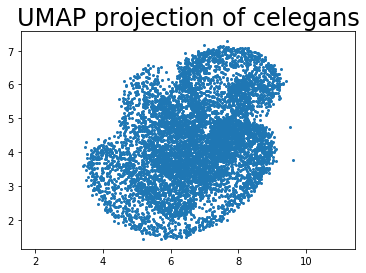

In [6]:
reducer = umap.UMAP(n_neighbors=50,
                      min_dist=0.1)
embedding2d = reducer.fit_transform(df)
print(embedding2d.shape)

plt.scatter(embedding2d[:, 0], embedding2d[:, 1], s = 4)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of celegans', fontsize=24);

In [8]:
reducer = umap.UMAP(n_neighbors=50,
                      min_dist=0.1,
                   n_components = 10)
embedding10d = reducer.fit_transform(df)
print(embedding10d.shape)


(7603, 10)


## GMM models

In [7]:
def bestGMM(pc):
    print('Best score corresponds to the minimum values of AIC/BIC')
    bic = []
    aic = []
    valid = []
    invalid = []
    outliers = []
    numberOfClusters = range (60, 100)
    for n in numberOfClusters:
        model = GaussianMixture(n, covariance_type ='full', random_state = 0).fit(pc)
        clusters = model.predict(pc)
        ns = list(zip(*sorted(Counter(clusters).items())))[1]
        ns = np.array(ns)
        valid.append(len(ns[ns>=10]))
        invalid.append(len(ns[ns<10]))
        outliers.append(np.sum(ns[ns<10]))
        print(f'{n} : Total {len(ns)}, valid(#>=10) {len(ns[ns>=10])}, invalid {len(ns[ns<10])}, outliers {np.sum(ns[ns<10])}' )
        bic.append(model.bic(pc))
        aic.append(model.aic(pc))
    #     plt.figure()
    #     plt.scatter(numberOfClusters, invalid, label = 'nb invalid clusters')

    plt.plot(numberOfClusters, bic, label = 'BIC')
    plt.plot(numberOfClusters, aic, label = 'AIC')
    plt.legend()
    plt.title('BIC/AIC')
    plt.xlabel('n_components')
    plt.show()
    return valid, invalid, outliers


In [12]:
r = bestGMM(embedding10d)

Best score corresponds to the minimum values of AIC/BIC
60 : Total 60, valid(#>=10) 60, invalid 0, outliers 0
61 : Total 61, valid(#>=10) 61, invalid 0, outliers 0
62 : Total 62, valid(#>=10) 62, invalid 0, outliers 0
63 : Total 63, valid(#>=10) 63, invalid 0, outliers 0
64 : Total 64, valid(#>=10) 64, invalid 0, outliers 0
65 : Total 65, valid(#>=10) 65, invalid 0, outliers 0
66 : Total 66, valid(#>=10) 66, invalid 0, outliers 0
67 : Total 67, valid(#>=10) 67, invalid 0, outliers 0
68 : Total 68, valid(#>=10) 68, invalid 0, outliers 0
69 : Total 69, valid(#>=10) 69, invalid 0, outliers 0
70 : Total 70, valid(#>=10) 70, invalid 0, outliers 0
71 : Total 71, valid(#>=10) 71, invalid 0, outliers 0
72 : Total 72, valid(#>=10) 72, invalid 0, outliers 0
73 : Total 73, valid(#>=10) 73, invalid 0, outliers 0
74 : Total 74, valid(#>=10) 74, invalid 0, outliers 0
75 : Total 75, valid(#>=10) 75, invalid 0, outliers 0
76 : Total 76, valid(#>=10) 76, invalid 0, outliers 0
77 : Total 77, valid(#>=10

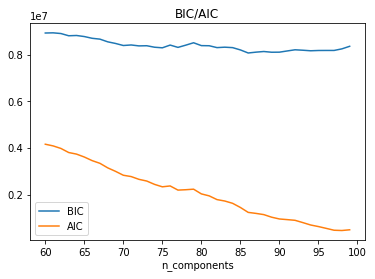

In [15]:

bestGMM(pc)

### Select Best GMM

In [10]:
n = 97
model = mixture.GaussianMixture(n, covariance_type ='full', random_state = 0).fit(embedding10d)
clusters = model.predict(embedding10d)

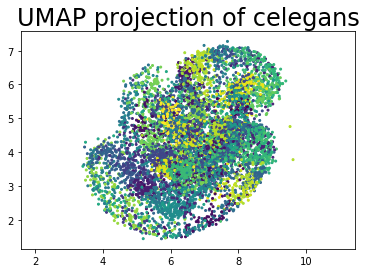

In [13]:
plt.scatter(embedding2d[:, 0], embedding2d[:, 1], s = 4, c = clusters)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of celegans', fontsize=24);

In [24]:
rankings_gene_scores, rankings_gene_names, rankings_gene_pvals = ttest_scores(df_matrix, clusters)

4 25


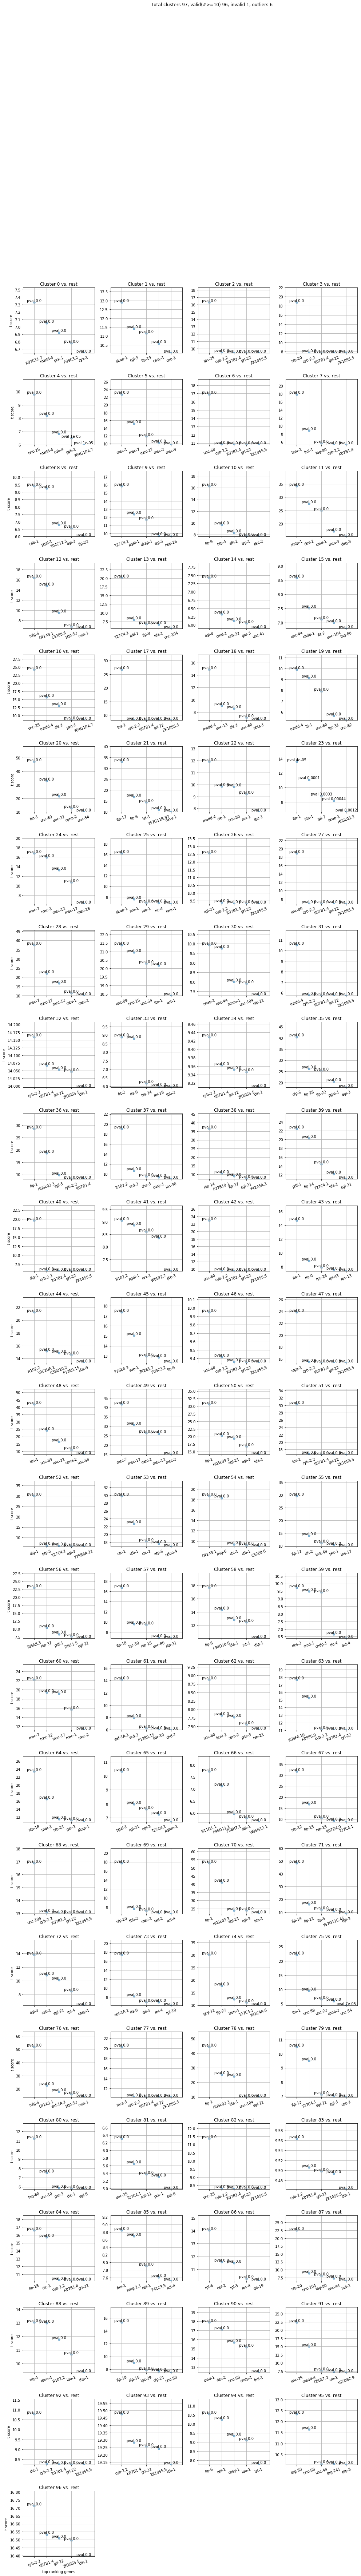

In [25]:
plot_ttest(clusters, rankings_gene_scores, rankings_gene_names, rankings_gene_pvals)

(7603, 2)


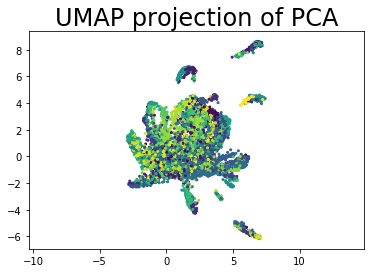

In [32]:
reducer = umap.UMAP(n_neighbors=30,
                      min_dist=0.2,
                      metric='correlation')
embedding = reducer.fit_transform(pc)
print(embedding.shape)

plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, s = 4)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of PCA', fontsize=24);

In [11]:
for n in tqdm(range(80, 81)):
    M, clusters = kMedoids(d,n)
#     clusters = KMeans(n_clusters=n).fit_predict(df)
#     model = mixture.GaussianMixture(n, covariance_type ='full', random_state = 0).fit(pc)
#     clusters = model.predict(pc)
    ns = list(zip(*sorted(Counter(clusters).items())))[1]
    ns = np.array(ns)
    print(f'Total {len(ns)}, valid(#>=10) {len(ns[ns>=10])}, invalid {len(ns[ns<10])}, outliers {np.sum(ns[ns<10])}' )
#     ac = cluster.AgglomerativeClustering(n_clusters=n).fit(pc10d)
#     clusters= ac.labels_

100%|██████████| 1/1 [00:05<00:00,  5.55s/it]

Total 80, valid(#>=10) 79, invalid 1, outliers 6


In [ ]:
rankings_gene_scores, rankings_gene_names, rankings_gene_pvals = ttest_scores(df, clusters)